### Data exploration

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.path as path
%matplotlib inline


In [2]:
# loading data into pd
data = pd.read_csv('data/training/rcar/BOT_data_rcar_20170102_20170102_part0.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181293 entries, 0 to 181292
Data columns (total 8 columns):
car_id              181293 non-null object
date_time           181293 non-null object
lat                 181293 non-null float64
lon                 181293 non-null float64
power_mode          181293 non-null object
mileage             181290 non-null float64
speed               181293 non-null float64
fuel_consumption    181293 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 11.1+ MB


In [5]:
data.describe()

,lat,lon,mileage,speed,fuel_consumption
count,181293.000000,181293.000000,181290.000000,181293.000000,1.812930e+05
mean,30.517165,118.666182,3919.900938,27.553137,3.708092e+05
std,4.567048,17.747698,3546.468977,28.775631,3.401201e+05
min,0.000000,0.000000,45.000000,0.000000,2.200000e+01
25%,31.116326,121.298148,1252.000000,0.000000,1.210190e+05
50%,31.228217,121.417272,2959.000000,19.400000,2.822090e+05
75%,31.296693,121.515648,5048.000000,47.000000,5.190420e+05
max,32.007936,121.845265,18715.000000,127.300000,1.790219e+06


In [6]:
data.head()

,car_id,date_time,lat,lon,power_mode,mileage,speed,fuel_consumption
0,r74415,2017-01-02 13:02:21,31.027729,121.599790,dph,4583.0,0.0,141494
1,r76180,2017-01-02 14:07:35,31.289532,121.516822,dph,1253.0,20.9,178217
2,r76180,2017-01-02 14:07:40,31.289269,121.516912,dph,1253.0,20.5,178221
3,r76180,2017-01-02 14:07:55,31.288576,121.517211,dph,1253.0,18.6,178231
4,r76180,2017-01-02 14:18:10,31.255289,121.431247,dph,1263.0,67.5,179000


In [7]:
pd.value_counts(data['lat'].values, sort=True)

0.000000     3964
31.010317     153
31.554375     103
31.504919      89
31.083907      85
31.306612      85
31.504926      80
31.010316      80
31.504927      79
31.600668      73
31.361629      64
31.010325      60
31.504928      59
31.198716      59
31.263346      54
31.300711      54
31.600667      51
31.363798      50
31.554376      48
31.081794      46
31.352314      45
31.034583      45
31.298939      44
31.081793      41
31.010318      40
31.309679      40
31.274765      40
31.010322      40
31.274766      40
31.038711      39
             ... 
30.898816       1
31.212068       1
31.162932       1
31.194111       1
31.138857       1
31.199937       1
30.996765       1
30.997904       1
31.313758       1
31.172440       1
31.459672       1
31.025295       1
31.097657       1
31.163522       1
31.071477       1
31.154594       1
31.066962       1
31.290990       1
31.296235       1
31.374365       1
31.250635       1
31.117551       1
31.636276       1
30.122495       1
31.277660 

In [8]:
pd.value_counts(data['lon'].values, sort=True)

0.000000      3964
121.417222     164
121.417217     102
121.417221      93
121.025844      88
121.417220      78
121.025843      77
121.587175      73
121.321566      69
121.417218      69
121.452902      69
121.452898      68
121.493195      65
121.227499      65
121.336447      61
121.169242      57
121.401744      54
121.504599      50
121.417223      48
121.037553      47
121.537741      46
121.037543      44
121.373913      44
121.504965      44
121.037557      42
121.037545      39
121.473144      39
121.493196      39
121.417198      38
121.417219      38
              ... 
121.369688       1
121.525132       1
121.421844       1
121.221948       1
121.591778       1
121.414266       1
120.439603       1
121.584535       1
121.330858       1
121.264644       1
121.432332       1
121.344794       1
121.251011       1
121.431673       1
121.337780       1
121.354388       1
121.596463       1
121.336004       1
121.366007       1
121.557143       1
121.579287       1
121.437346  

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


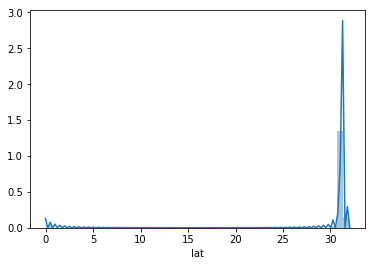

In [9]:
# plot distribution of latitude
sns.distplot(data['lat'])

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


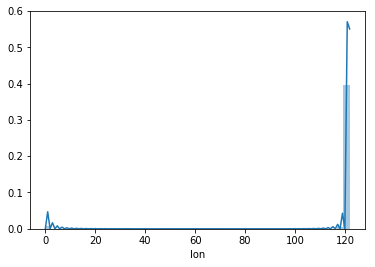

In [10]:
# plot distribution of longitude
sns.distplot(data['lon'])

In [26]:
grid_info = pd.read_csv('data/grid_info.csv')
print("minimum latitude:{}, max latitude:{}, minimun longtitude:{},max longtitude:{}"
      .format(grid_info['latitude_from'].min(), grid_info['latitude_to'].max(),
              grid_info['longitude_from'].min(),grid_info['longitude_to'].max()))

minimum latitude:31.15, max latitude:31.315, minimun longtitude:121.315,max longtitude:121.775


In [27]:
grid_info.head()

,grid_id,latitude_from,latitude_to,longitude_from,longitude_to
0,1,31.195,31.200,121.315,121.320
1,2,31.220,31.225,121.355,121.360
2,3,31.260,31.265,121.485,121.490
3,4,31.150,31.155,121.510,121.515
4,5,31.190,31.195,121.770,121.775


In [8]:
test_samples = pd.read_csv('data/submit_samples.csv')
test_samples

,grid_id,day,hour,car_number
0,1,20170313,9,43
1,2,20170313,9,30
2,3,20170313,9,96
3,4,20170313,9,19
4,5,20170313,9,67
5,6,20170313,9,81
6,7,20170313,9,83
7,8,20170313,9,36
8,9,20170313,9,29
9,10,20170313,9,46


In [15]:
# weather data
weathers = pd.read_csv('data/weather_by_hour.csv')
weathers.head(10)

,date,time,temperture,visibility,wind,rainy
0,1/1/2017,0:00,7,1,0,0
1,1/1/2017,1:00,6,1,0,0
2,1/1/2017,2:00,6,1,0,0
3,1/1/2017,3:00,5,1,0,0
4,1/1/2017,4:00,5,1,0,0
5,1/1/2017,5:00,5,1,0,0
6,1/1/2017,6:00,5,1,0,0
7,1/1/2017,7:00,5,1,0,0
8,1/1/2017,8:00,9,1,0,0
9,1/1/2017,9:00,11,1,1,0


C:\Users\EWWIQQU\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


max car number 72.0
min car number 0.0
median car number 6.0
Q3: 12.0


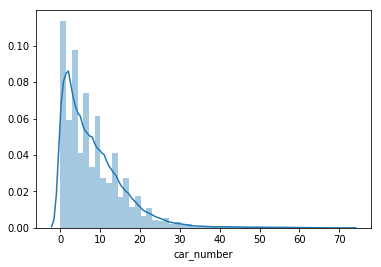

In [5]:
# visulization phase 1 data
train = pd.read_csv('data/training.csv')
# plot distribution of car number
sns.distplot(train['car_number'])

print("max car number", train['car_number'].max())
print("min car number", train['car_number'].min())
print("median car number", train['car_number'].median())

In [6]:
# find out liers
Q1 = train['car_number'].quantile(0.25)
Q3 = train['car_number'].quantile(0.75)
step = (Q3 - Q1) * 1.5
print("Q1:{},Q3:{},Step:{}".format(Q1, Q3, step))

Q1:3.0,Q3:12.0,Step:13.5


In [ ]:
true_false_array = ~((train['car_number'] >= Q1 - step) & (train['car_number'] <= Q3 + step))

In [13]:
def plot_hist(data):
    fig, ax = plt.subplots()
    n, bins = np.histogram(data, 50)
    # get the corners of the rectangles for the histogram
    left = np.array(bins[:-1])
    right = np.array(bins[1:])
    bottom = np.zeros(len(left))
    top = bottom + n
    # we need a (numrects x numsides x 2) numpy array for the path helper
    # function to build a compound path
    XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T
    # get the Path object
    barpath = path.Path.make_compound_path_from_polys(XY)
    # make a patch out of it
    patch = patches.PathPatch(barpath)
    ax.add_patch(patch)
    # update the view limits
    ax.set_xlim(left[0], right[-1])
    ax.set_ylim(bottom.min(), top.max())
    plt.show()

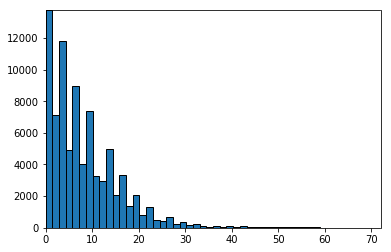

In [14]:
plot_hist(train['car_number'])

In [129]:
def generate_date(row):
    year = int(row['year'])
    month = int(row['month'])
    day = int(row['day'])
    if day < 10:
        day = '0' + str(day)    
    return str(year) + '0' + str(month) + str(day)

def plot_car_number_curve_by_hour_and_grid(train, hour, grid):    
    # generate title
    title = 'Grid ' + str(grid) + ' hour ' + str(hour)
    # filter by hour
    row_hour_index = train.hour == hour
    df = train.loc[row_hour_index]
    # filter by grid id
    row_grid_index = df.grid_id == grid
    df = df.loc[row_grid_index]    
    df['date'] = df.apply(lambda row : generate_date(row), axis=1)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    plt.plot(df['date'], df['car_number'])
    plt.rcParams['figure.figsize'] = 10, 5
    plt.title(title)
    plt.show()

In [132]:
# plot all the grid at 9 pm
#for grid_id in range(1, 51):
    #plot_car_number_curve_by_hour_and_grid(train, 9, grid_id)

In [133]:
# plot grid id 44 from 9 to 22
#for hour in range(9, 23):
    #plot_car_number_curve_by_hour_and_grid(train, hour, 44)